In [ ]:
!pip install scikit-image watermark -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 16.8 MB/s eta 0:00:00


In [1]:
#Importamos la librerias necesarias
import numpy as np
import cv2
from cv2 import imread
import matplotlib.pyplot as plt

In [2]:
#Elegimos una imagen y la cargamos para trabajar con la misma
!wget https://www2.eecs.berkeley.edu/Research/Projects/CS/vision/bsds/BSDS300/html/images/plain/quarter/color/198023.jpg

--2025-04-18 00:18:32--  https://www2.eecs.berkeley.edu/Research/Projects/CS/vision/bsds/BSDS300/html/images/plain/quarter/color/198023.jpg
Resolving www2.eecs.berkeley.edu (www2.eecs.berkeley.edu)... 128.32.244.190
Connecting to www2.eecs.berkeley.edu (www2.eecs.berkeley.edu)|128.32.244.190|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3300 (3.2K) [image/jpeg]
Saving to: ‘198023.jpg’

198023.jpg          100%[===================>]   3.22K  --.-KB/s    in 0s      

2025-04-18 00:18:33 (1.02 GB/s) - ‘198023.jpg’ saved [3300/3300]



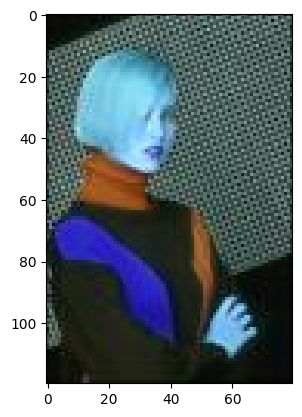

In [3]:
#Leemos la imagen seleccionada utilizando metodo imread de libreria cv2 y la asignamos a variable "img"
img = imread('198023.jpg')
plt.imshow(img)
plt.show()

In [4]:
#Se define función para obenter información de la imagen
def data_img(img):
  print('Tamaño = ',img.shape)
  print('Max  = ',np.max(img))
  print('Min  = ',np.min(img))
#Se ejecuta función
data_img(img)

Tamaño =  (120, 80, 3)
Max  =  255
Min  =  0


###Se observa que los colores de la imagen no se aprecian bien. Por otro lado la función arroja información acerca de las dimensiones de la imagen, la cantidad de canales y los valores minimos y maximos que la imagen posee.

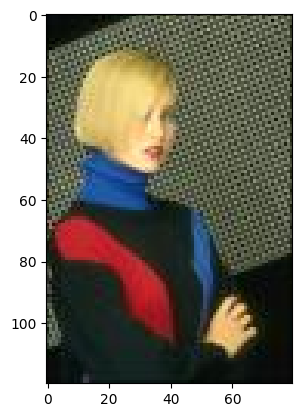

In [5]:
#Utilizamos una función de la libreria cv2 para convertir el orden de los canales y pasar de BGR a RGB
img_rgb = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

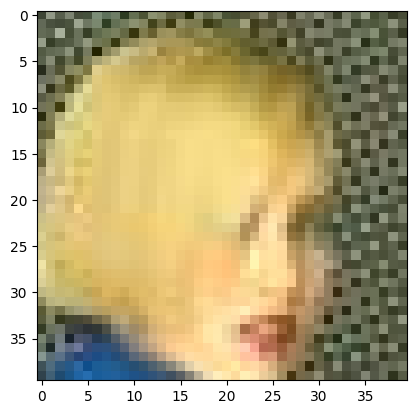

In [7]:
# Realizamos un recorte, primero se indica el alto, luego el ancho
recorte = img_rgb[10:50, 10:50]
plt.imshow(recorte)

In [8]:
#visualizamos la información de un pixel gris
recorte[35,0]

array([120, 132, 112], dtype=uint8)

In [9]:
#luego visualizamos la información de un pixel mas oscuro
recorte[36,1]

array([30, 42, 40], dtype=uint8)

In [12]:
#llevamos a cabo la extraccion de los distintos canales r=red, g=green y b=blue
img_r=img_rgb[:,:,0]
img_g=img_rgb[:,:,1]
img_b=img_rgb[:,:,2]

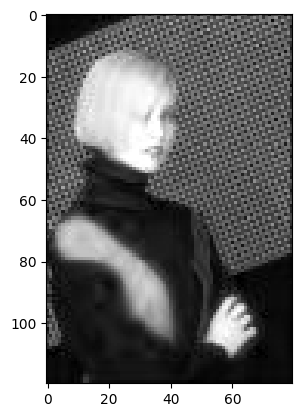

In [20]:
#ploteamos el canal rojo pero en escala de grises
plt.imshow(img_r, cmap='grey')

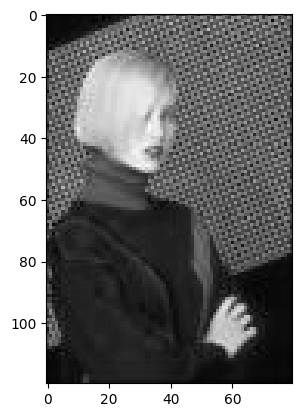

In [21]:
#ploteamos el canal verde pero en escala de grises
plt.imshow(img_g, cmap='grey')

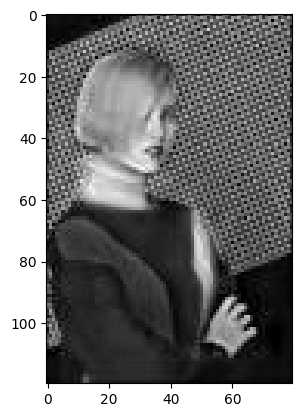

In [22]:
#plotemos el canal azul en escala de grises
plt.imshow(img_b, cmap='grey')

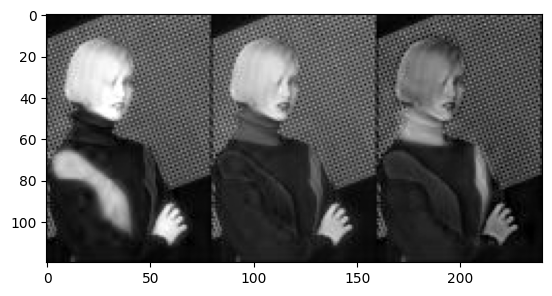

In [23]:
#ploteamos la imagen en sus tres canales por separado, en escala de grises
plt.imshow(np.hstack([img_r, img_g, img_b]),cmap='gray')

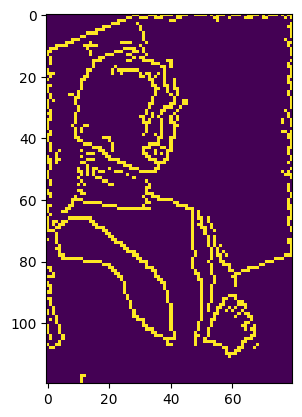

In [24]:
#con la funcion canny de la libreria cv2 intenamos mostrar el borde del objeto de la imagen, en nuestro caso la mujer
img_rgb_canny=cv2.Canny(img_rgb,100,200)
plt.imshow(img_rgb_canny)

In [28]:
#vamos a utilizar una libreria alternativa para identificar el borde del objeto de nuestra image
import skimage as ski

<ipython-input-31-16cb61ab86dc>:2: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  ski.io.imshow(borde)
<ipython-input-31-16cb61ab86dc>:3: FutureWarning: `show` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  ski.io.show()


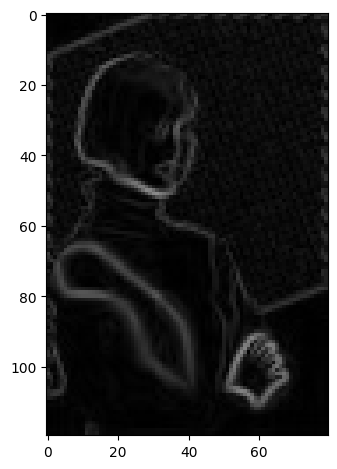

In [31]:
borde = ski.filters.sobel(img_r)
ski.io.imshow(borde)
ski.io.show()

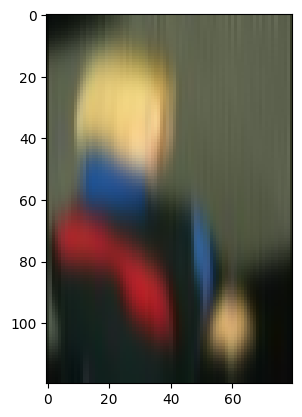

In [26]:
#utilizamos la funcion gaussianblur para suavizar o desenfocar una imagen
img_blur = cv2.GaussianBlur(img_rgb,(1,31),0)
plt.imshow(img_blur)